# EXAM INFO284 - 2023 SPRING

# Task 1 - Mushroom classification
In this task we are making three classification models on the Mushroom dataset, we have decided on using KNN, RandomForestClassifier and BernoulliNB. We will use these models to predict whether the mushroom is edible or not based on these features. 



## 1.1 The Data-set

The dataset contains information about different mushrooms and their edibility. It consists of over 8122 instances, which are the mushrooms, and 22 features that represents a characteristic of the mushrooms, like odor, cap shape, gill size and more.
 
Before we start building the classification models, we will be exploring the dataset, get an understanding of what it contains, then clean the data and prepare the data for modeling.


## 1.2 Imports 

We import the modules and libaries that will be used. Pandas provides a wide range of tools, makes it easy to xplore and visulize data which is great for machine learning where the quality of the data is important for results. 
We will be using a quite large amout of data, which panda is great at handeling efficiently 

We are also using the sklearn liberary for all classification and is easy to use when implementing various machine learning algorithms. In this task we mainly use sklearn because it gives us a wide range of classifiers that we wish to use on our dataset. While the liberary also gives us tools, like LabelEncoder, to prepare the data, We will also be using it when evaluating the performance of these classifing models. 

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

## 1.3 Preparing data

In [43]:
#reading the csv mushroom dataset
mushroom = pd.read_csv('agaricus-lepiota.csv')
df= pd.DataFrame(mushroom)
mushroom.head()

,e,x,s,y,t,a,f,c,b,k,...,s.2,w,w.1,p,w.2,o,p.1,n,n.1,g
0,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
1,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
3,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
4,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m


In [44]:
#labeling the columns
labels = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruised', 'odor',
'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root',
'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring','veil_type', 'veil_color', 'ring_number',
'ring-type', 'spore_print_color', 'population', 'habitat']


df.columns = labels
mushroom.head()


,class,cap_shape,cap_surface,cap_color,bruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring-type,spore_print_color,population,habitat
0,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
1,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
3,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
4,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m


In [45]:
#encoding the categorical data, giving each category an unique numerical value
labelencoder = LabelEncoder()

for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

mushroom.head()  

,class,cap_shape,cap_surface,cap_color,bruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring-type,spore_print_color,population,habitat
0,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
1,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
2,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
3,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
4,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3


In [46]:
#no null/missing values in the dataset
df.isna().sum()


class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruised                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring-type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [79]:
#Number of mushrooms, number of features
print(mushroom.shape) 

(8122, 23)


0    4207
1    3915
Name: class, dtype: int64


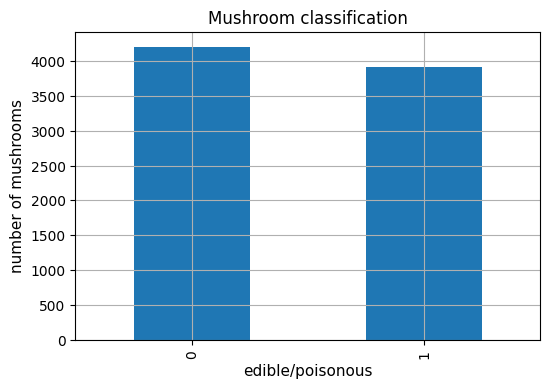

In [75]:
#using plt to visulize
count = mushroom['class'].value_counts()
print(count)

plt.figure(figsize=(6,4))
count.plot(kind='bar')
plt.grid(True)
plt.xlabel('edible/poisonous', fontsize = 11)
plt.ylabel('number of mushrooms', fontsize = 11)
plt.title('Mushroom classification')

plt.show()



We visulize the distribution between the two classes, edible and poisonous. We see that there are slightly more edible mushrooms than poisonous ones in the dataset. 

In [48]:
df.drop('veil_type', axis=1)

,class,cap_shape,cap_surface,cap_color,bruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring-type,spore_print_color,population,habitat
0,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
1,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
2,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
3,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
4,0,0,2,8,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8118,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8119,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8120,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


Dropping the feature veil_type because it only gave us one value - a constant feature, that would not help the prediciton. 

In [49]:
#making set without the feature class as x
x= df.loc[:, df.columns != 'class']
x.head()


,cap_shape,cap_surface,cap_color,bruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring-type,spore_print_color,population,habitat
0,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
1,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
2,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
3,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
4,0,2,8,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,2,3


In [50]:
#the y will be the feature class - that we should predict
y = df['class'].to_frame()
y.head()

,class
0,0
1,1
2,0
3,0
4,0


In [51]:
#spliting the data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=56)

In [52]:
print(X_train.shape)
print(y_train.shape)

(6497, 22)
(6497, 1)


In [53]:
print(X_test.shape)
print(y_test.shape)

(1625, 22)
(1625, 1)


## 1.4 The Models

1.  KNN

We now use the KNeighborsClassifier to classify the edbility of the mushrooms 

In [54]:
#importing first model from Sklearn
from sklearn.neighbors import KNeighborsClassifier


In [67]:
knn= KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=30)

In [68]:
knn.score(X_test, y_test)

0.9870769230769231

To evaluate the performance of our model we will use the kFold cross-validation technique. Mainly to avoid overfitting by training an testing the model on different subsets of the data. 

In [74]:
from sklearn.model_selection import KFold, cross_val_score

folds = KFold(n_splits= 5)
scores = cross_val_score(knn, x, y.values.ravel(), cv = folds)
print('Accuracy of each fold: ', scores)
print('The mean score result: ', scores.mean())



Accuracy of each fold:  [0.50338462 0.99692308 0.9729064  0.81465517 0.86453202]
The mean score result:  0.8304802576733611


As we can see after using the KFold method, the first fold gives us worse estimate than the rest of the folds, 
there could be multiple reasons for that. The first fold could be containing data that is significantly different than the rest of the folds, or the model being too complex and overfitting. 

2. RandomForest

Finding the important features of this data set could help to reduse the dimentions of the dataset. to do this we will use the RandomForestClassification. 

In [58]:
from sklearn.ensemble import RandomForestClassifier


C:\Users\Ida\AppData\Local\Temp\ipykernel_21036\721472879.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)


|    | feature                  |   feature_importance |
|---:|:-------------------------|---------------------:|
|  0 | cap_shape                |           0.00423414 |
|  1 | cap_surface              |           0.0132184  |
|  2 | cap_color                |           0.0163676  |
|  3 | bruised                  |           0.0480655  |
|  4 | odor                     |           0.158087   |
|  5 | gill_attachment          |           0.00121765 |
|  6 | gill_spacing             |           0.0360562  |
|  7 | gill_size                |           0.13192    |
|  8 | gill_color               |           0.115937   |
|  9 | stalk_shape              |           0.0257902  |
| 10 | stalk_root               |           0.0681405  |
| 11 | stalk_surface_above_ring |           0.0360195  |
| 12 | stalk_surface_below_ring |           0.0529647  |
| 13 | stalk_color_above_ring   |           0.015747   |
| 14 | stalk_color_below_ring   |           0.018203   |
| 15 | veil_type               

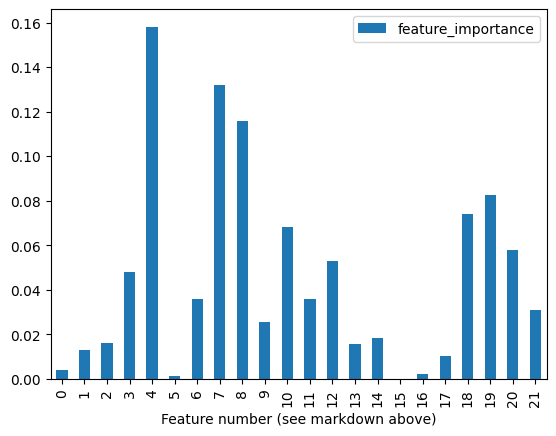

In [59]:
RF = RandomForestClassifier()

RF.fit(X_train, y_train)

#Finding the important feature 
feature_importance = pd.DataFrame(
    {'feature': list(X_train.columns),
     'feature_importance': [abs(i) for i in RF.feature_importances_]}  
)

#printing the overview markdown 
print(feature_importance.to_markdown())

#and as a diagram
feature_importance.plot(kind = 'bar')
plt.xlabel('Feature number (see markdown above)')
plt.show()

The inspiration to find important features and use them in this way, we got from this site: towardsdatascience.com, by Giovanni Valdata: https://towardsdatascience.com/feature-importance-to-predict-mushrooms-edibility-in-python-5aa133fea3f8, 14.09. 22, read: 10.04.23

We are also using RF to classify the mushrooms. By using all the features we can find the accuracy in identifing the mushrooms edibility with RandomForest.

In [60]:
print('RandomForest Accuracy: ', RF.score(X_test, y_test))

RandomForest Accuracy:  1.0


We see that the accuracy is 100% 

3. BernoulliNB

BernoulliNB is another classification model that we will use to classify the mushrooms because this is a binary classification. It works well with binary data and can handle large number of features and high-dimentional datasets, like we have in the mushroomset.  

In [61]:
#importing BernoulliNB classification that we will use next
from sklearn.naive_bayes import BernoulliNB


In [62]:
model = BernoulliNB(alpha=0.2)
model.fit(X_train, y_train.values.ravel())


BernoulliNB(alpha=0.2)

In [63]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       853
           1       0.89      0.73      0.80       772

    accuracy                           0.83      1625
   macro avg       0.84      0.83      0.83      1625
weighted avg       0.84      0.83      0.83      1625



In [64]:
print('BernoulliNB accuracy: ', accuracy_score(y_test, pred))

BernoulliNB accuracy:  0.8307692307692308


Even though this model is accurate, the BernoulliNB classifier may not be as effective as the two other models we have used. This model assumes, among other factors, that the features are independent of eachother, this might not be the case for the dataset we are working with. Where the odor and spore print may be correlated with each other and with the target variable, ignoring this could give us the litle reduced accuracy we are seeing. 

## 1.5 Feature Selection 

Now we also use feature selection at last, only the most important features for the model, this could also reduse overfitting. We test it on our two best performing models, knn and RF.  

In [65]:
#making new variables for the new data to be used, mostly for the visability we also make a new y
x2 = df[['odor', 'gill_size', 'gill_color', 'spore_print_color']]
y2 = df['class']

#splitting again - with way less features as x
X2_train, X2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.2, random_state=56)

RF.fit(X2_train, y2_train)
knn.fit(X2_train, y2_train)
pred_RF = RF.predict(X2_test)


print('Report for the RF prediction: \n', classification_report(y2_test, pred_RF))

#printing the score accuracy for both to compare 
print('RandomForestClassifier score: ', RF.score(X2_test, y2_test))
print('Knn score: ', knn.score(X2_test, y2_test))

Report for the RF prediction: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       853
           1       0.98      1.00      0.99       772

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

RandomForestClassifier score:  0.9926153846153846
Knn score:  0.9673846153846154


Using only the important features also gives us aboutthe same accuracy as using all of the features in the dataset on the RandomForest model. The KNearestNeighbour got a litle better accuracy. 

## 1.6 Results

Based on the outcome of the different models used in this task, we would trust the RandomForest model to choose which mushrooms to eat. 
It has the abilty to identify the important features and give us an good accuracy score based on these features. It is also good to use on high-dimensional datasets like the mushroom dataset. This is where KNN is not as goood compared, because the large number of categories makes it difficult to find the best neighbours. Another factor could be that the Knn is prone to overfitting because it dont have enough data to generalize well. 

The RandomForest classifier can also handle non-linear and high-dimentional datasets like this one well. Based on the accuracy score, if we were to trust any one of these models, that would be the most trustworthy one. 
KNN has some limitations when it comes to the imbalanced data, more edible instances than poisonous in one class, where Random Forest adjusts the wheights of the samples and handles this better. 
